# NetworkX

Импортируем инструменты

In [1]:
import random

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import networkx as nx

## Создание графа

Создание графа по списку смежности

[[3, 0], [8, 7], [7, 4], [3, 17], [2, 18], [13, 1], [0, 2], [6, 7], [16, 0], [17, 6]]


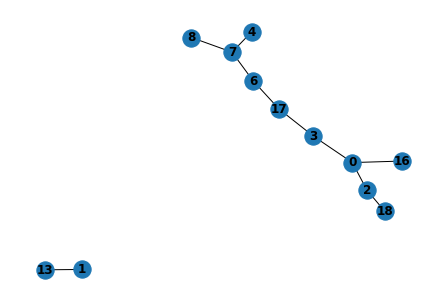

In [2]:
random.seed(42)
edge_list = [random.sample(range(20), 2) for _ in range(10)]
print(edge_list)
graph = nx.Graph(edge_list)
nx.draw(graph, with_labels=True, font_weight='bold')

Чтобы рисовать граф по списку смежности, достаточно перейти к списку дуг

In [3]:
def adjacency_list_to_edge_list(adjacency_list):
    n = len(adjacency_list)
    return [(i, j) for i in range(n) for j in adjacency_list[i] if i < j]

In [4]:
adjacency_list = [[1, 3], [0, 2, 3], [1], [0, 1]]
edge_list = adjacency_list_to_edge_list(adjacency_list)
print(edge_list)

[(0, 1), (0, 3), (1, 2), (1, 3)]


По списку дуг несложно получить список вершин

In [5]:
def edge_list_to_vertex_list(edge_list):
    vertex_list = []
    for edge in edge_list:
        a, b = edge
        if a not in vertex_list:
            vertex_list.append(a)
        if b not in vertex_list:
            vertex_list.append(b)
    return sorted(vertex_list)

In [6]:
vertex_list = edge_list_to_vertex_list(edge_list)
print(vertex_list)

[0, 1, 2, 3]


По списку дуг несложно получить матрицу смежности

In [7]:
def edge_list_to_adjacency_matrix(edge_list):
    adjacency_matrix = [[0 for _ in range(len(vertex_list))] for _ in range(len(vertex_list))]
    for edge in edge_list:
        a, b = edge
        adjacency_matrix[a][b] = 1
        adjacency_matrix[b][a] = 1
    return adjacency_matrix

In [8]:
adjacency_matrix = edge_list_to_adjacency_matrix(edge_list)
for row in adjacency_matrix:
    print(row)

[0, 1, 0, 1]
[1, 0, 1, 1]
[0, 1, 0, 0]
[1, 1, 0, 0]


Несложно выполнить и обратную операцию

In [9]:
def adjacency_matrix_to_edge_list(adjacency_matrix):
    n = len(adjacency_matrix)
    return [(i, j) for i in range(n) for j in range(i, n) if adjacency_matrix[i][j] == 1]

In [10]:
print(adjacency_matrix_to_edge_list(adjacency_matrix))

[(0, 1), (0, 3), (1, 2), (1, 3)]


Для взвешенных дуг есть вот такой способ

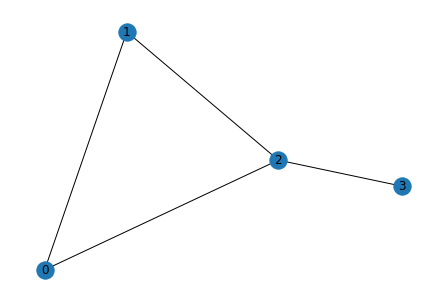

In [11]:
weighted_edge_list = [(0, 1, 5.0), (1, 2, 3.0), (0, 2, 1.0), (2, 3, 7.3)]
weighted_graph = nx.Graph()
weighted_graph.add_weighted_edges_from(weighted_edge_list)
nx.draw(weighted_graph, with_labels=True)

Аналогичным образом выглядит приведение взвешенной матрицы смежности к списку взвешенных рёбер

In [12]:
def weighted_adjacency_matrix_to_weighted_edge_list(adjacency_matrix):
    n = len(adjacency_matrix)
    return [(i, j, adjacency_matrix[i][j]) for i in range(n) for j in range(i, n) if adjacency_matrix[i][j] != 0]

In [13]:
weighted_adjacency_matrix = [[0, 5.0, 1.0, 0], [5.0, 0, 3.0, 0], [1.0, 3.0, 0, 7.3], [0, 0, 7.3, 0]]

for row in weighted_adjacency_matrix:
    print(row)

print("\n", weighted_adjacency_matrix_to_weighted_edge_list(weighted_adjacency_matrix), sep="")

[0, 5.0, 1.0, 0]
[5.0, 0, 3.0, 0]
[1.0, 3.0, 0, 7.3]
[0, 0, 7.3, 0]

[(0, 1, 5.0), (0, 2, 1.0), (1, 2, 3.0), (2, 3, 7.3)]


## Генерация случайных графов различных типов

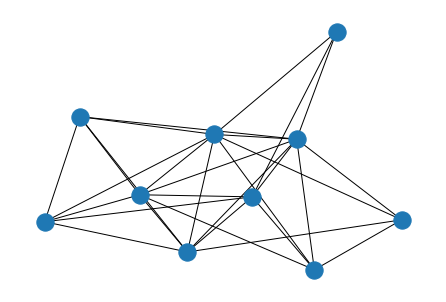

In [14]:
nx.draw(nx.fast_gnp_random_graph(10, 0.5))

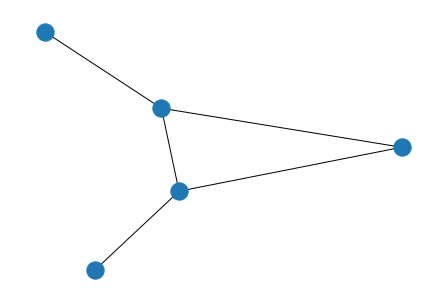

In [15]:
nx.draw(nx.dense_gnm_random_graph(5, 5))